<a href="https://colab.research.google.com/github/Renatosnp1/Titanic---Machine-Learn/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregando base de dados

In [ ]:
train = '/content/drive/MyDrive/ESTUDOS/COMPETIÇÃO KAGGLE/TITANIC/train.csv'
test = '/content/drive/MyDrive/ESTUDOS/COMPETIÇÃO KAGGLE/TITANIC/test.csv'

df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza de dados

* Renomeando as COLUNAS

In [ ]:
df_train = df_train[['Pclass' ,'SibSp', 'Parch','Age','Sex', 'Fare', 'Survived']]
df_train.columns = ['CLASSE' ,'IRMAO_ESPOSA','PAIS_FILHOS','IDADE','SEXO', 'VALOR_PASSAGEM', 'SOBREVIVEU']

df_test = df_test[['Pclass' ,'SibSp', 'Parch','Age','Sex', 'Fare']]
df_test.columns = ['CLASSE' ,'IRMAO_ESPOSA','PAIS_FILHOS','IDADE', 'VALOR_PASSAGEM','SEXO']

#IDADE
1 - Ajustando as IDADES faltantes
* Usando média para preencher as IDADES faltantes

2 - Criando RANGE para as IDADES

In [ ]:
def faixa_idade(idade):
  if idade < 5:
    return 0
  elif idade < 15:
    return 1
  elif idade < 20:
    return 2
  elif idade < 30:
    return 3
  elif idade < 40:
    return 4
  elif idade < 50:
    return 5
  else:
    return 6

df_train["IDADE"] = df_train["IDADE"].apply(faixa_idade)
df_test["IDADE"] = df_test["IDADE"].apply(faixa_idade)

In [ ]:
media_man_1class = df_train[(df_train.CLASSE == 1) & (df_train.SEXO == 'male') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()
media_woman_1class = df_train[(df_train.CLASSE == 1) & (df_train.SEXO == 'female') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()

media_man_2class = df_train[(df_train.CLASSE == 2) & (df_train.SEXO == 'male') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()
media_woman_2class = df_train[(df_train.CLASSE == 2) & (df_train.SEXO == 'female') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()

media_man_3class = df_train[(df_train.CLASSE == 3) & (df_train.SEXO == 'male') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()
media_woman_3class = df_train[(df_train.CLASSE == 3) & (df_train.SEXO == 'female') & (df_train.VALOR_PASSAGEM != 0)].VALOR_PASSAGEM.mean()

print(f'Man 1ª class valor passagem {media_man_1class:.2f}')
print(f'Man 2ª class valor passagem {media_man_2class:.2f}')
print(f'Man 3ª class valor passagem {media_man_3class:.2f}')
print('='*50)
print(f'Woman 1ª class valor passagem {media_woman_1class:.2f}')
print(f'Woman 2ª class valor passagem {media_woman_2class:.2f}')
print(f'Woman 3ª class valor passagem {media_woman_3class:.2f}')

Man 1ª class valor passagem 70.10
Man 2ª class valor passagem 20.90
Man 3ª class valor passagem 12.81
Woman 1ª class valor passagem 106.13
Woman 2ª class valor passagem 21.97
Woman 3ª class valor passagem 16.12


* Ajustando sexo para banary

In [ ]:
convert_sexo = {
    'male': 0,
    'female':1}

df_train['SEXO'] = df_train['SEXO'].map(convert_sexo)
df_test['SEXO'] = df_test['SEXO'].map(convert_sexo)

# Ajustando O MODELO

In [ ]:
x = df_train.drop('SOBREVIVEU', axis=1).values
y = df_train['SOBREVIVEU'].values

df_train.SOBREVIVEU.value_counts()

SOBREVIVEU
0    549
1    342
Name: count, dtype: int64

#TomekLinks

Com esse técnica eu excluído da base as informações que está próximo a fronteira com a variável alvo.

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

x_under, y_under = tl.fit_resample(x, y)

np.unique(y_under, return_counts=True)

(array([0, 1]), array([513, 342]))

#SMOTE

Aqui eu gero registros sintécos na classe menor

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

x_over, y_over = smote.fit_resample(x_under, y_under)

np.unique(y_over, return_counts=True)

(array([0, 1]), array([513, 513]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, random_state=42, test_size=0.20, stratify=y_over)

#GaussianNB

In [ ]:
treino = GaussianNB()
treino.fit(x_train, y_train)
predict_Gau = treino.predict(x_test)

accuracy_score(predict_Gau, y_test)

0.7961165048543689

#REDE NEURAL

In [ ]:
rede_neural = MLPClassifier(tol=0.00001, max_iter=2000, hidden_layer_sizes=(20,20))
rede_neural.fit(x_train, y_train)
predict_Rede = rede_neural.predict(x_test)

accuracy_score(predict_Rede, y_test)

0.7815533980582524

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       103
           1       0.82      0.73      0.77       103

    accuracy                           0.78       206
   macro avg       0.78      0.78      0.78       206
weighted avg       0.78      0.78      0.78       206



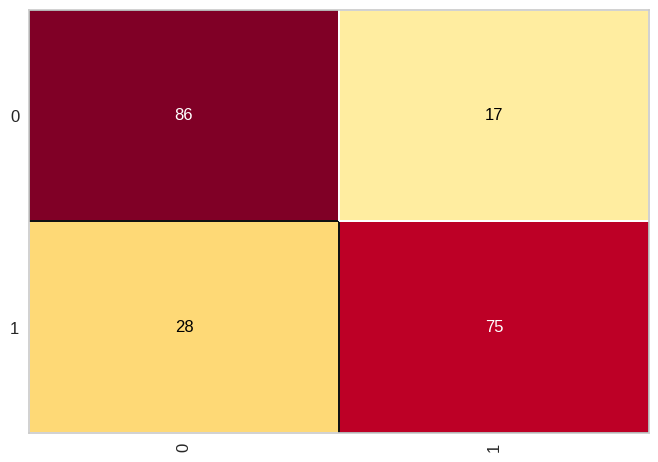

In [ ]:
cm = ConfusionMatrix(rede_neural)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

print(classification_report(y_test, predict_Rede))